In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [5]:
path = "/content/drive/MyDrive/Ejercicios Core/Pandas para Ciencia de Datos II   Proyecto I – Parte III (Core)/retail_sales_dataset.csv"

df = pd.read_csv(path)

Mostramos las primeras 10 filas del DqtaFrame

In [6]:
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


Limpiamos los espacios que esten demas y agregamos _

In [7]:
df.columns = df.columns.str.replace(" ", "_")

Mostramos las ultimas 5 filas del DataFrame

In [8]:
df.tail()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


Visalizamos la informacion general con el metodo info()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction_ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer_ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product_Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price_per_Unit    1000 non-null   int64 
 8   Total_Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Utiliamos el metodo describe() para obtener estadisticas relacionado al Dataframe

In [10]:
df.describe()

,Transaction_ID,Age,Quantity,Price_per_Unit,Total_Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Insepccionamos los tipos de datos de cada columna

In [11]:
df.dtypes

,0
Transaction_ID,int64
Date,object
Customer_ID,object
Gender,object
Age,int64
Product_Category,object
Quantity,int64
Price_per_Unit,int64
Total_Amount,int64


Contamos los valores unicos de la columna Producto

In [12]:
df["Product_Category"].value_counts()

,count
Product_Category,
Clothing,351
Electronics,342
Beauty,307


Visualizamos los valores unicos de la columna Producto

In [13]:
df["Product_Category"].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

Filtramos el datafrome para ventas que fueron mayor a 50

In [14]:
filter_sales = (df["Total_Amount"] > 50)
df[filter_sales]

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
...,...,...,...,...,...,...,...,...,...
993,994,2023-12-18,CUST994,Female,51,Beauty,2,500,1000
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


Filtramos el dataframe por precio que sean menores a 0.5

In [15]:
filter_price = df["Price_per_Unit"] < 0.5
df[filter_price]

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount


filtramos el dataframe para mostrar las filas donde producto sea Electronics y las ventas sean mayores a 30

In [16]:
filter_product = df.query('Product_Category == "Electronics" & Total_Amount > 30')
filter_product

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
12,13,2023-08-05,CUST013,Male,22,Electronics,3,500,1500
14,15,2023-01-16,CUST015,Female,42,Electronics,4,500,2000
17,18,2023-04-30,CUST018,Female,47,Electronics,2,25,50
...,...,...,...,...,...,...,...,...,...
984,985,2023-05-30,CUST985,Female,19,Electronics,2,25,50
991,992,2023-08-21,CUST992,Female,57,Electronics,2,30,60
992,993,2023-02-06,CUST993,Female,48,Electronics,3,50,150
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


Seleccinoamos y visualizamos solo Product_Category y Total Amount

In [17]:
columns_filter = df[["Product_Category", "Total_Amount"]]
columns_filter

,Product_Category,Total_Amount
0,Beauty,150
1,Clothing,1000
2,Electronics,30
3,Clothing,500
4,Beauty,100
...,...,...
995,Clothing,50
996,Beauty,90
997,Beauty,100
998,Electronics,150


Utilizando loc[], selecciona y muestra las filas de la 5 a la 10 (inclusive) y las columnas Producto y Total (Ya que tienda no hay como columna)

In [18]:
columns_filter.loc[0:10]

,Product_Category,Total_Amount
0,Beauty,150
1,Clothing,1000
2,Electronics,30
3,Clothing,500
4,Beauty,100
5,Beauty,30
6,Clothing,50
7,Electronics,100
8,Electronics,600
9,Clothing,200


Utilizando iloc[], selecciona y muestra las primeras 5 filas y las primeras 3 columnas del DataFrame.

In [19]:
df.iloc[0:5,0:3]

,Transaction_ID,Date,Customer_ID
0,1,2023-11-24,CUST001
1,2,2023-02-27,CUST002
2,3,2023-01-13,CUST003
3,4,2023-05-21,CUST004
4,5,2023-05-06,CUST005


In [20]:
# Crea nuevas columnas: Basándonos en los datos existentes, crea nuevas columnas que sean útiles para el análisis. Por ejemplo, calcula el ingreso total por venta y normaliza las ventas.

# Extraemos de la columna date el mes y año y lo creamos separado para posibles analises anula o el comportamiento mensual

# Convertiros ahora la columna Date en Datetime para poder extraer datos de esa misma columna

df["Date"] = pd.to_datetime(df["Date"])

In [21]:
# Ahora si hacemos la extraccion

df["year"] = df['Date'].dt.year
df["month"] = df['Date'].dt.month

In [22]:
df.head()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,year,month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5


In [23]:
# Clasifica los datos: Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).

# Creamos una funcino que nos permitira categorizar la nueva columna

def getCategory(total: str):
  if total >= 1000:
    return "alta"
  elif total < 1000 and total >= 500:
    return "media"
  else:
    return "baja"

In [24]:
# Aplicamos la funciona desarrollada

df["category_sales"] = df["Total_Amount"].apply(getCategory)

In [25]:
# Agrupación por múltiples columnas: Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.

df.groupby(["year","Product_Category" ])["Quantity"].count()

year  Product_Category
2023  Beauty              306
      Clothing            351
      Electronics         341
2024  Beauty                1
      Electronics           1
Name: Quantity, dtype: int64

In [26]:
# Aplicar funciones de agregación: Utiliza funciones como sum, mean, count, min, max, std, y var para obtener estadísticas descriptivas de cada grupo.

agg = {
    'Total_Amount': ['sum', 'mean', 'count', 'min', 'max', 'std', 'var'],
    'Price_per_Unit': ['min', 'max'],
    'Quantity': ['sum']
}

df.groupby(['Product_Category']).agg(agg)

Total_Amount                                          \
                          sum        mean count min   max         std   
Product_Category                                                        
Beauty                 143515  467.475570   307  25  2000  563.612788   
Clothing               155580  443.247863   351  25  2000  550.695917   
Electronics            156905  458.786550   342  25  2000  567.540150   

                                Price_per_Unit      Quantity  
                            var            min  max      sum  
Product_Category                                              
Beauty            317659.374401             25  500      771  
Clothing          303265.992674             25  500      894  
Electronics       322101.822341             25  500      849

In [27]:
# Para calcular la desviacion de cada venta en relacion a la media del grupo aplicamos, creamos una nueva columna promedio que sera el promedio ocupando el metodo transform para mentener el mismo numeros de fila y agruparlas por
# el calculo de media que estamos haciendo


df['promedio'] = df.groupby('Product_Category')['Total_Amount'].transform('mean')
df.head()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,year,month,category_sales,promedio
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,baja,467.475570
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,alta,443.247863
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,baja,458.786550
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,media,443.247863
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,baja,467.475570


In [28]:
# Creamos la columna desviacion que sera el resultado entre el total amount del producto menos la nueva columna de la media de su grupo.
df['desviation'] = df['Total_Amount'] - df['promedio']

In [29]:
df.head()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,year,month,category_sales,promedio,desviation
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,baja,467.475570,-317.475570
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,alta,443.247863,556.752137
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,baja,458.786550,-428.786550
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,media,443.247863,56.752137
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,baja,467.475570,-367.475570


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer_ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product_Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price_per_Unit    1000 non-null   int64         
 8   Total_Amount      1000 non-null   int64         
 9   year              1000 non-null   int32         
 10  month             1000 non-null   int32         
 11  category_sales    1000 non-null   object        
 12  promedio          1000 non-null   float64       
 13  desviation        1000 non-null   float64       
dtypes: datetime64[ns](1), flo

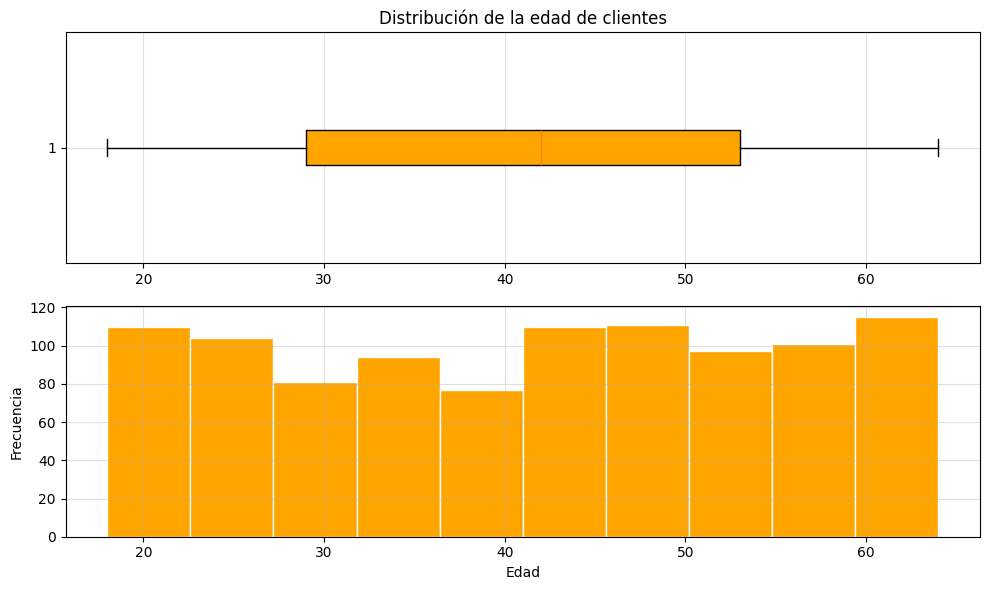

In [31]:
# Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.


plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.boxplot(df["Age"], vert=False, patch_artist=True, boxprops=dict(facecolor='orange'))
plt.title("Distribución de la edad de clientes")
plt.grid(alpha=0.4)

plt.subplot(2, 1, 2)
plt.hist(df["Age"], bins=10, color='orange', edgecolor='white')
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()

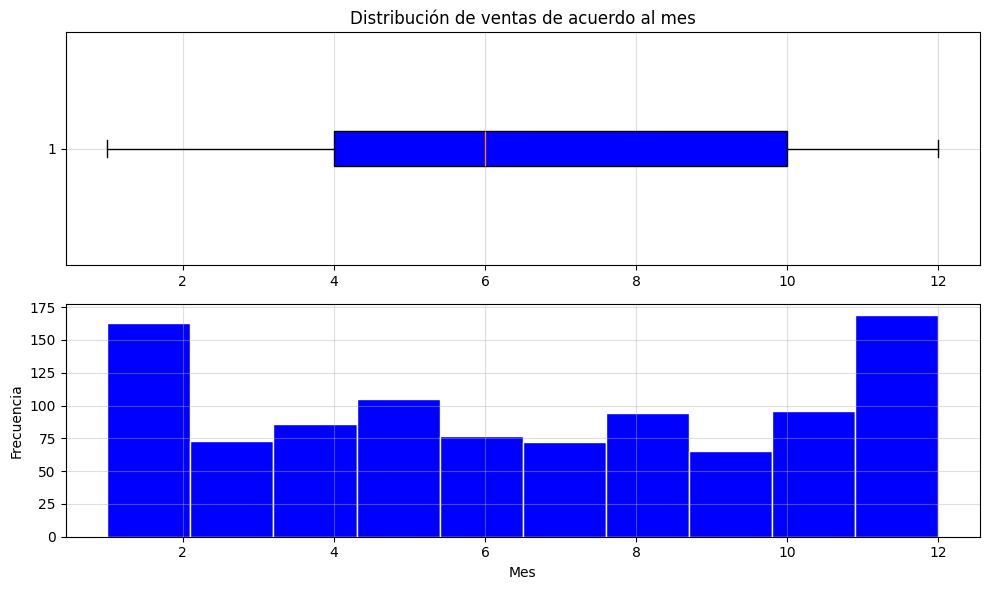

In [32]:

plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.boxplot(df["month"], vert=False, patch_artist=True, boxprops=dict(facecolor='blue'))
plt.title("Distribución de ventas de acuerdo al mes")
plt.grid(alpha=0.4)

plt.subplot(2, 1, 2)
plt.hist(df["month"], bins=10,  color='blue', edgecolor='white')
plt.xlabel("Mes")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()

In [33]:
# Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.
df_linea = df.groupby("Date")["Total_Amount"].mean().reset_index()

fig = px.line(
    df_linea,
    x="Date",
    y="Total_Amount",
    title="Promedio de venta a lo largo del tiempo"
)
fig.update_traces(mode="lines+markers")
fig.update_layout(title_font_size=18)
fig.show()

<Axes: xlabel='Age', ylabel='Total_Amount'>

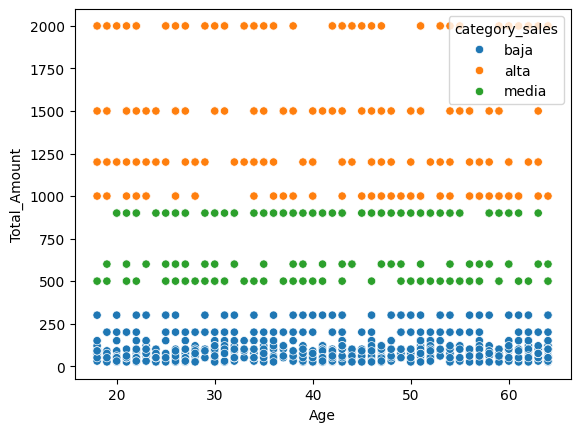

In [34]:
# Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

#Visualizamos si existe una relacoin entre edad y el total de compra

sns.scatterplot(data=df, x="Age", y="Total_Amount", hue="category_sales")

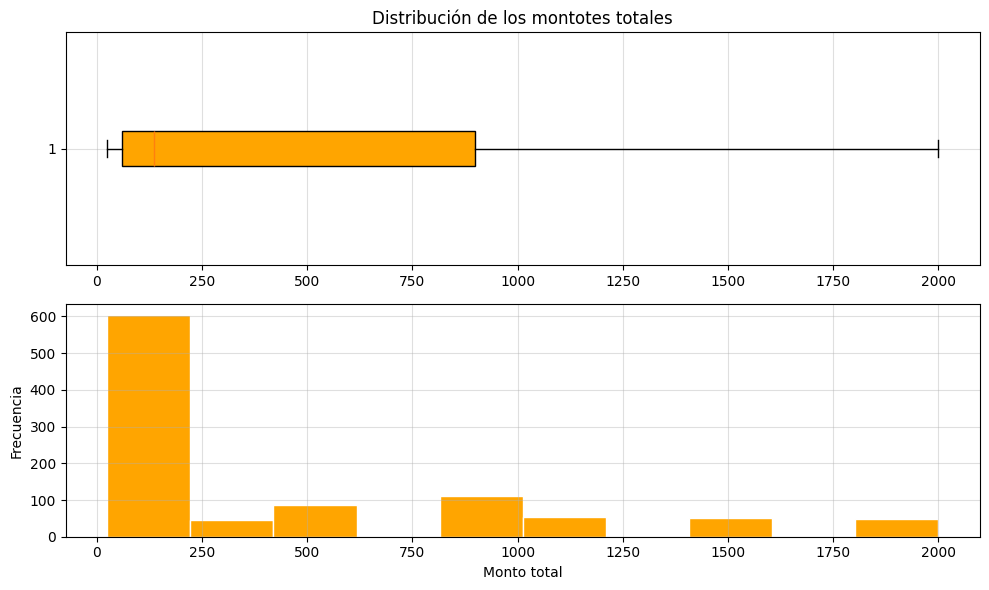

In [65]:
# Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.


plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.boxplot(df["Total_Amount"], vert=False, patch_artist=True, boxprops=dict(facecolor='orange'))
plt.title("Distribución de los montotes totales")
plt.grid(alpha=0.4)

plt.subplot(2, 1, 2)
plt.hist(df["Total_Amount"], bins=10, color='orange', edgecolor='white')
plt.xlabel("Monto total")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()

Analisis: No se visualizan valores atipicos en el boxplot. La mediana se concentra en 125 aproxidamente como monto total.

En le histograma la mayor concentracion de ventas totales se concentra en la cantidad de 0 a 240 aproximadamente.

In [37]:
df.head()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,year,month,category_sales,promedio,desviation
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,baja,467.475570,-317.475570
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,alta,443.247863,556.752137
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,baja,458.786550,-428.786550
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,media,443.247863,56.752137
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,baja,467.475570,-367.475570


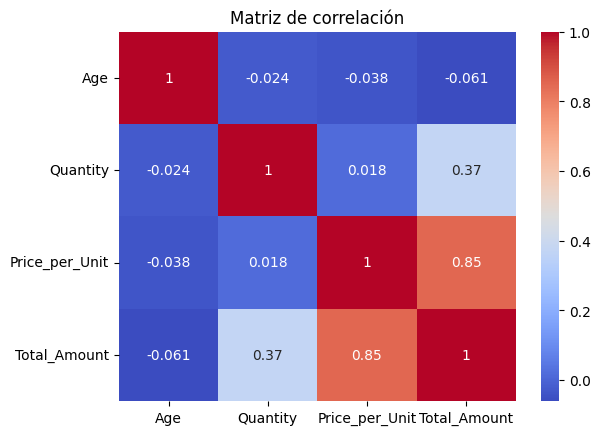

In [41]:
# Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.

corr = df[["Age", "Quantity", "Price_per_Unit", "Total_Amount"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

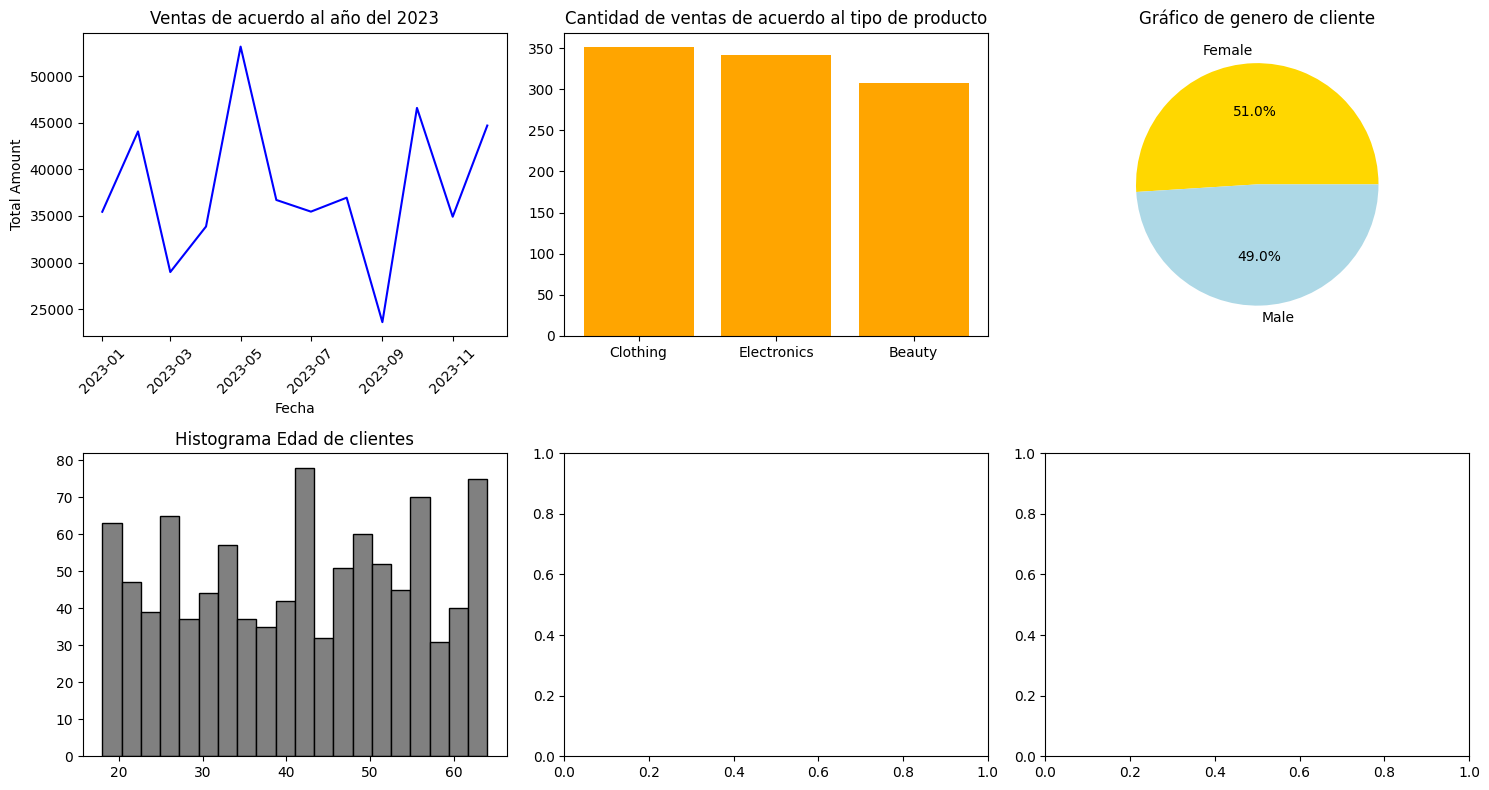

In [82]:


# Crear la figura y los subplots.
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Filtrar por el año 2023
filter_by_2023 = (df["year"] == 2023)

# Agrupar por año y mes, y sumar el Total_Amount
amount = df[filter_by_2023].groupby(["year", "month"])["Total_Amount"].sum().reset_index()

# Crear columna de fecha con día 1
amount["date"] = pd.to_datetime(amount[["year", "month"]].assign(day=1))

# Graficar
axs[0, 0].plot(amount["date"], amount["Total_Amount"], color='blue')
axs[0, 0].set_title('Gráfico de Líneas')
axs[0, 0].set_xlabel('Fecha')
axs[0, 0].set_ylabel('Total Amount')
axs[0, 0].tick_params(axis='x', rotation=45)  # Opcional: rotar etiquetas del eje x

axs[0, 0].set_title('Ventas de acuerdo al año del 2023')

# Gráfico de barras.
products = df["Product_Category"].value_counts()
axs[0, 1].bar(products.index, products.values, color='orange')
axs[0, 1].set_title('Cantidad de ventas de acuerdo al tipo de producto')


# Gráfico de torta.
axs[0, 2].pie(df["Gender"].value_counts(), labels=df["Gender"].value_counts().index, autopct='%1.1f%%', colors=['gold', 'lightblue', 'lightgreen', 'salmon'])
axs[0, 2].set_title('Gráfico de genero de cliente')

# Histograma.
axs[1, 0].hist(df["Age"], bins=20, color='gray', edgecolor='black')
axs[1, 0].set_title('Histograma Edad de clientes')

# Ajustar el espacio entre gráficos.
plt.tight_layout()
plt.show()

In [66]:
df["Product_Category"].value_counts()

,count
Product_Category,
Clothing,351
Electronics,342
Beauty,307
